# Working with Pandas using COVID19 Data

In [1]:
import datetime
import pandas as pd
from matplotlib import pyplot as plt

## Get some data to work with and prepare the data frame

In [2]:
# Download data for Canada

# Data source: Government of Canada -  Coronavirus disease (COVID-19): Outbreak update
# https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html?topic=tilelink#a1
# CSV link next to the map: https://health-infobase.canada.ca/src/data/covidLive/covid19.csv
df_can = pd.read_csv('https://health-infobase.canada.ca/src/data/covidLive/covid19.csv')

In [3]:
# Index by Date
## Convert date-strings into date objects
df_can['date'] = pd.to_datetime(df_can['date'], dayfirst=True)
## set date as index column
df_can = df_can.set_index("date")

In [4]:
# Make a new frame with five data-columns
df_incidence = df_can[ ['prname', 'pruid', 'numtoday', 'ratetotal_last7'] ]

## Filter the data in differnt ways

In [5]:
# Filter by numeric field
df_incidence[ df_incidence['pruid'] == 10 ].tail(5)

,prname,pruid,numtoday,ratetotal_last7
date,,,,
2022-04-28,Newfoundland and Labrador,10,126,153.11
2022-04-29,Newfoundland and Labrador,10,102,143.50
2022-04-30,Newfoundland and Labrador,10,103,136.97
2022-05-01,Newfoundland and Labrador,10,29,125.64
2022-05-02,Newfoundland and Labrador,10,65,121.41


In [6]:
# Filter by string field
df_incidence[ df_incidence['prname'] == 'Ontario' ].tail(5)

,prname,pruid,numtoday,ratetotal_last7
date,,,,
2022-04-28,Ontario,35,3560,155.17
2022-04-29,Ontario,35,2760,142.30
2022-04-30,Ontario,35,2799,135.41
2022-05-01,Ontario,35,2243,122.90
2022-05-02,Ontario,35,1275,117.82


In [7]:
# Filter by multiple conditions
df_incidence[ (df_incidence['prname'] == 'Ontario')  |  (df_incidence['prname'] == 'Alberta') ].tail(5)

,prname,pruid,numtoday,ratetotal_last7
date,,,,
2022-04-30,Ontario,35,2799,135.41
2022-05-01,Alberta,48,0,147.85
2022-05-01,Ontario,35,2243,122.90
2022-05-02,Alberta,48,0,147.85
2022-05-02,Ontario,35,1275,117.82


In [15]:
# Filter by comparing numerical value
df_incidence[ df_incidence['numtoday'] >= 10_000.0 ].tail(5)

,prname,pruid,numtoday,ratetotal_last7
date,,,,
2022-04-16,Canada,1,11410,174.09
2022-04-18,Canada,1,18930,173.94
2022-04-19,Canada,1,11324,168.27
2022-04-23,Canada,1,12609,168.50
2022-04-26,Canada,1,11935,152.64


## Plot the data from the frame

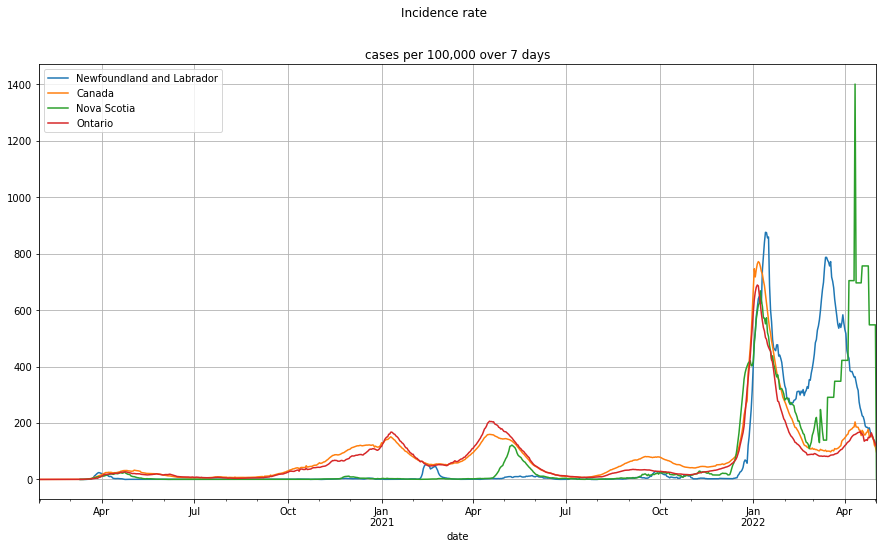

In [16]:
# plot using Matplotlib
fig1 = plt.figure(figsize=(15,8))

#df_incidence[ df_incidence['pruid'] == 10  ]['ratetotal_last7']
plt.suptitle("Incidence rate")
plt.title("cases per 100,000 over 7 days")
df_incidence[ df_incidence['pruid'] == 10 ]['ratetotal_last7'].plot( label="Newfoundland and Labrador"  )
df_incidence[ df_incidence['pruid'] == 1  ]['ratetotal_last7'].plot( label="Canada")
df_incidence[ df_incidence['pruid'] == 12 ]['ratetotal_last7'].plot( label="Nova Scotia")
df_incidence[ df_incidence['pruid'] == 35 ]['ratetotal_last7'].plot( label="Ontario")
#df_incidence[ df_incidence['pruid'] == 24 ]['ratetotal_last7'].plot( label="Quebec")

# plt.xlim(datetime.datetime.today() - datetime.timedelta(weeks=70), datetime.datetime.today() )

plt.legend()
plt.grid(which="major", axis='both')
plt.show()